# Regressão Linear

### Importar pandas e matplotlib

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

### Criar um Data Frame de faturamento mensal de 12 meses

In [3]:
faturamento = [25,38,29,115,82,114,120,160,153,190,239,175]

In [4]:
mes = list(range(1,13))
mes

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

In [5]:
data_dict = {'mes': mes, 'faturamento': faturamento}
data_dict

{'mes': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 'faturamento': [25, 38, 29, 115, 82, 114, 120, 160, 153, 190, 239, 175]}

In [6]:
data = pd.DataFrame.from_dict(data_dict)  # Passa o dicionario para um dataframe
data

,mes,faturamento
0,1,25
1,2,38
2,3,29
3,4,115
4,5,82
5,6,114
6,7,120
7,8,160
8,9,153
9,10,190


### Visualizar dados em Gráfico de Dispersão

In [7]:
x = data['mes']
y = data['faturamento']  # O Y é sempre o que queremos prever

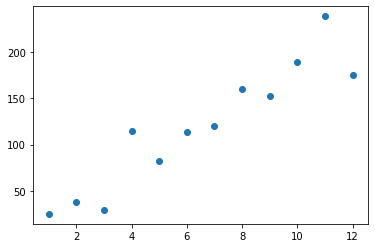

In [8]:
plt.scatter(x,y)

## Criar Modelo Preditivo aplicando fórmulas (manualmente)

<center><strong>Equação da Regressão Linear</strong></center><br>
Essa é a equação para desenhar uma reta. Mas quando usamos essa equação para criar uma Regressão Linear especificamente, colocamos o acento circunflexo no $\hat{y}$.

$$\hat{y} = mx + b$$

<strong>m</strong> = inclinação da linha<br>
<strong>b</strong> = interceptação do y<br>
<strong>(x,y)</strong> = pontos coordenados<br>

$$m = \frac {n\sum {xy}-\sum x \sum y}{n\sum x^2-(\sum x)^2}$$<br>

$$b = \frac {\sum y-m\sum x}{n}$$

##### Para achar o 'm' da formula a cima, fazendo os calculos manualmente
# m

In [9]:
x.sum()

78

In [10]:
y.sum()

1440

In [11]:
x*y

0       25
1       76
2       87
3      460
4      410
5      684
6      840
7     1280
8     1377
9     1900
10    2629
11    2100
dtype: int64

In [12]:
(x*y).sum()

11868

In [13]:
x**2

0       1
1       4
2       9
3      16
4      25
5      36
6      49
7      64
8      81
9     100
10    121
11    144
Name: mes, dtype: int64

In [14]:
(x**2).sum()

650

In [15]:
len(data)

12

$$m = \frac {n\sum {xy}-\sum x \sum y}{n\sum x^2-(\sum x)^2}$$<br>

### Aplicando a formula com os calculos feitos a cima

In [16]:
m = (len(data) * (x*y).sum() - x.sum()*y.sum()) / (len(data) * (x**2).sum() - (x.sum())**2)
m.round(4)

17.5385

#### Aplicando para 'b'
# b

$$b = \frac {\sum y-m\sum x}{n}$$

In [17]:
b = ( y.sum() - m*x.sum() ) / len(data)
b.round()

6.0

### Modelo Preditivo
Criar modelo preditivo para prever (ou estimar) o rendimento de qualquer mês

$$\hat{y} = mx + b$$

In [18]:
xpred = 4  # xpred = x prediçoes  | Esse numero que colocamos é o mes que queremos saber a predição

In [19]:
ypred = m*xpred + b
ypred

76.15384615384615

### Predições para os 12 meses
Criar uma lista contendo as predições para cada um dos 12 meses

In [20]:
predicoes = []
for elemento in x:
    ypred = m*elemento + b
    predicoes.append(ypred)

In [21]:
y-predicoes

0      1.461538
1     -3.076923
2    -29.615385
3     38.846154
4    -11.692308
5      2.769231
6     -8.769231
7     13.692308
8    -10.846154
9      8.615385
10    40.076923
11   -41.461538
Name: faturamento, dtype: float64

## Inserir predições no DataFrame

In [22]:
data['predicoes'] = predicoes

### Visualizar Regressão Linear

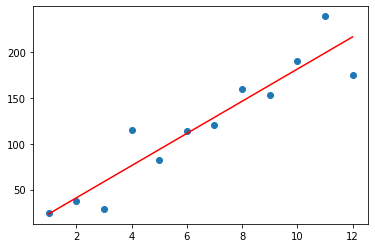

In [23]:
plt.scatter(x,y)
plt.plot(x,predicoes,color='red')

# Coeficiente de Determinação - R-quadrado ($R²$)

- Basicamente é um coeficiente que te diz quao confiavel são os metodos que voce esta utilizando (somente para regressao linear se entendi bem
- SQres - Somatoria quadratica dos residuos
- o 'y' é o faturamento original, e o 'y com chapeu' é o 'y' previsto anteriormente

$$R^2 = 1 - \frac {SQ_{res}} {SQ_{tot}} = 1 - \frac {\sum (y_i - \hat{y}_i)^2}{\sum (y_i - \overline y)^2} $$

### Calcular Soma Quadrática dos Resíduos (SQres)

O residuo é o y (faturamento normal) - y(com chapeu) (faturamento previsto)

In [24]:
data['residuos'] = y-predicoes  # y-y(com chapeu) | Esse é o residuo

In [25]:
(data['residuos']**2)  # Por causa da formula

0        2.136095
1        9.467456
2      877.071006
3     1509.023669
4      136.710059
5        7.668639
6       76.899408
7      187.479290
8      117.639053
9       74.224852
10    1606.159763
11    1719.059172
Name: residuos, dtype: float64

In [26]:
(data['residuos']**2).sum()  # Elevou ao quadrado

6323.538461538462

In [27]:
SQres = (data['residuos']**2).sum()  # So colocou na variavel
SQres

6323.538461538462

### Calcular Soma Quadrática Total (SQtot)

In [28]:
media = y.mean()  # Media do faturamento original
media

120.0

In [29]:
data['y_medio'] = media

In [30]:
data

,mes,faturamento,predicoes,residuos,y_medio
0,1,25,23.538462,1.461538,120.0
1,2,38,41.076923,-3.076923,120.0
2,3,29,58.615385,-29.615385,120.0
3,4,115,76.153846,38.846154,120.0
4,5,82,93.692308,-11.692308,120.0
5,6,114,111.230769,2.769231,120.0
6,7,120,128.769231,-8.769231,120.0
7,8,160,146.307692,13.692308,120.0
8,9,153,163.846154,-10.846154,120.0
9,10,190,181.384615,8.615385,120.0


Abaixo so para mostrar como ficaria o grafico em relação a media normal e nao com a regressao linear

In [31]:
y_medio = data['y_medio']

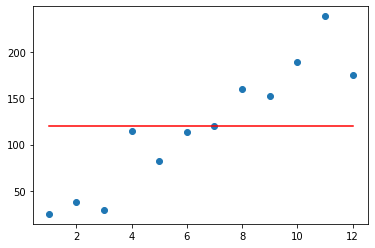

In [32]:
plt.scatter(x,y)
plt.plot(x,y_medio,color='red')

Acima so para mostrar como ficaria o grafico em relação a media normal e nao com a regressao linear

In [33]:
data['total'] = y - data['faturamento'].mean()  # Para achar o SQtot

In [34]:
(data['total']**2)  # Eleva ao quadrado por causa da formula

0      9025.0
1      6724.0
2      8281.0
3        25.0
4      1444.0
5        36.0
6         0.0
7      1600.0
8      1089.0
9      4900.0
10    14161.0
11     3025.0
Name: total, dtype: float64

In [35]:
(data['total']**2).sum()  # soma tudo

50310.0

In [36]:
SQtot = (data['total']**2).sum()  # So colocando na variavel
SQtot

50310.0

### Calcular R-quadrado

- Isso sig que nosso modelo preditivo consegue explicar 87,43% dos dados

In [37]:
r_quadrado = 1-SQres/SQtot
r_quadrado.round(4)

0.8743

# RMSE
Raiz do Erro Quadrático Médio

$ e = y_i - \hat{y_i} $ <br>

$ RMSE = \sqrt {\sum \frac {e^2}{n}}$<br>



Como se fosse um desvio padrao

In [38]:
(data['residuos']**2).sum()

6323.538461538462

In [39]:
len(data['residuos'])

12

### Importar numpy

In [40]:
import numpy as np

- RMSE Quanto menor esse valor, melhor. O RMSE é o desvio padrao da regressao linear, e se aplica a ele tambem a regra empirica 68-98-99,7

In [41]:
rmse = np.sqrt((data['residuos']**2).sum() / len(data['residuos']) )
rmse # desvio padrao da linha

22.95564284574794

In [42]:
predicoes

[23.538461538461522,
 41.07692307692306,
 58.6153846153846,
 76.15384615384615,
 93.6923076923077,
 111.23076923076923,
 128.76923076923075,
 146.3076923076923,
 163.84615384615384,
 181.3846153846154,
 198.9230769230769,
 216.46153846153845]

# Regra Empírica 68-95-99.7

In [43]:
um_acima = predicoes+rmse
um_abaixo = predicoes-rmse

In [44]:
dois_acima = predicoes+2*rmse
dois_abaixo = predicoes-2*rmse

In [45]:
tres_acima = predicoes+3*rmse
tres_abaixo = predicoes-3*rmse

# Um desvio padrão 68% 

Isso sig que até 68% dos dados tem que estao dentro das linhas roxas

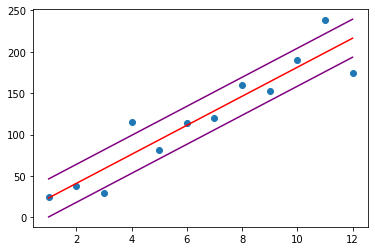

In [46]:
plt.scatter(x,y)
plt.plot(x,predicoes,color='red')
plt.plot(x,um_acima,color='purple')
plt.plot(x,um_abaixo,color='purple')

# Dois desvios padrões 95%

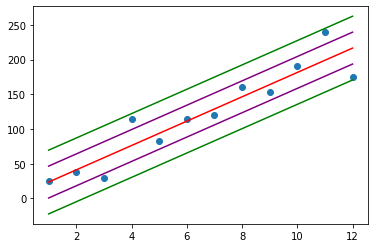

In [47]:
plt.scatter(x,y)
plt.plot(x,predicoes,color='red')
plt.plot(x,um_acima,color='purple')
plt.plot(x,um_abaixo,color='purple')
plt.plot(x,dois_acima,color='green')
plt.plot(x,dois_abaixo,color='green')

# Três desvios padrões 99.7%

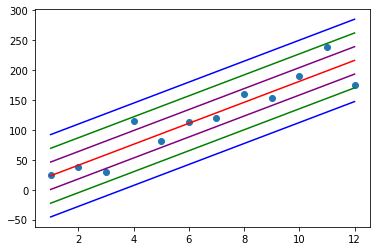

In [48]:
plt.scatter(x,y)
plt.plot(x,predicoes,color='red')
plt.plot(x,um_acima,color='purple')
plt.plot(x,um_abaixo,color='purple')
plt.plot(x,dois_acima,color='green')
plt.plot(x,dois_abaixo,color='green')
plt.plot(x,tres_acima,color='blue')
plt.plot(x,tres_abaixo,color='blue')

# Daq para baixo vamos fazer tudo automaticamente utilizando as bibliotecas. Vamos fazer a mesma coisa de cima

# Regressão Linear - Statsmodels

### Importar Statsmodels 

In [49]:
import statsmodels.api as sm  # Biblioteca 

### Definir x e y

In [50]:
x = data['mes']  # Ja temos definido lá em cima, mas vamos definir novamente
y = data['faturamento']

### Adicionar constante

- Algo interessante de se dizer, é que nao precisamos ter o 'b' da formula para fazer as predições, mas nesse caso vamos add o 'b'(constant) para termos os mesmos resultados (provar) de cima.
- Nesse exemplo que usamos, a predição aparentemente até sairia melhor sem a constant, mas nem sempre é assim e fizemos para sabermos que existe


In [51]:
x = sm.add_constant(x.values)  # Add a constant no x

In [52]:
x

array([[ 1.,  1.],
       [ 1.,  2.],
       [ 1.,  3.],
       [ 1.,  4.],
       [ 1.,  5.],
       [ 1.,  6.],
       [ 1.,  7.],
       [ 1.,  8.],
       [ 1.,  9.],
       [ 1., 10.],
       [ 1., 11.],
       [ 1., 12.]])

### Treinar Modelo

In [53]:
model = sm.OLS(y,x).fit()

### Gerar predição

In [54]:
ols_pred = model.predict()
ols_pred

array([ 23.53846154,  41.07692308,  58.61538462,  76.15384615,
        93.69230769, 111.23076923, 128.76923077, 146.30769231,
       163.84615385, 181.38461538, 198.92307692, 216.46153846])

### Verificar parâmetros de performance do Modelo Preditivo

In [55]:
model.summary()  # Traz todas as informações sobre o nosso modelo  | Aqui so nao temos o RMSE

C:\Users\Arakaki\Anaconda3\lib\site-packages\scipy\stats\stats.py:1450: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            faturamento   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     69.56
Date:                Wed, 25 Mar 2020   Prob (F-statistic):           8.16e-06
Time:                        12:19:08   Log-Likelihood:                -54.630
No. Observations:                  12   AIC:                             113.3
Df Residuals:                      10   BIC:                             114.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.0000     15.477      0.388      0.706     -28.484      40.484
x1            17.5385      2.103      8.340      0.000      12.853      22.224
==============================================================================
Omnibus:                        0.197   Durbin-Watson:                   2.757
Prob(Omnibus):                  0.906   Jarque-Bera (JB):                0.142
Skew:                           0.175   Prob(JB):                        0.932
Kurtosis:                       2.599   Cond. No.                         15.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### RMSE

In [56]:
from statsmodels.tools.eval_measures import rmse

In [57]:
rmse(y,ols_pred)  # Só isso para gerar o rmse

22.955642845747942

# A baixo vamos fazer tudo dnv só que com outra biblioteca

# Regressão Linear - Sklearn

### Importar sklearn

In [58]:
from sklearn import linear_model  # Lib

### Instanciar Modelo de Regressão Linear

In [59]:
lm = linear_model.LinearRegression()  # Instanciando (definindo)

### Reshape x (remodelar x)
Se X não possuir múltiplas variáveis, sklearn solicita que modifiquemos o formato

Para dar o reshape, precisamos primeiro transformar o X em um array

In [60]:
x = data['mes']
x = np.array(x)
x = x.reshape(-1,1)
x

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11],
       [12]], dtype=int64)

### Treinar Modelo

In [61]:
model = lm.fit(x,y)

### Gerar predições

In [62]:
skpred = model.predict(x)
skpred

array([ 23.53846154,  41.07692308,  58.61538462,  76.15384615,
        93.69230769, 111.23076923, 128.76923077, 146.30769231,
       163.84615385, 181.38461538, 198.92307692, 216.46153846])

### $R^2$

In [63]:
lm.score(x,y)  # R quadrado

0.8743085179578917

### m

In [64]:
lm.coef_

array([17.53846154])

### b

In [65]:
lm.intercept_

6.000000000000028

### RMSE

In [66]:
from sklearn.metrics import mean_squared_error

In [67]:
r = mean_squared_error(y,skpred)
r

526.9615384615386

In [68]:
np.sqrt(r)  # Resultado de cima aplicando a raiz quadrada

22.95564284574794

# Aqui a baixo é so para vizualizarmos que os 3 chegaram no mesmo resultado

# Todas Predições

### Calculado Manualmente

In [69]:
np.array(predicoes)

array([ 23.53846154,  41.07692308,  58.61538462,  76.15384615,
        93.69230769, 111.23076923, 128.76923077, 146.30769231,
       163.84615385, 181.38461538, 198.92307692, 216.46153846])

### Calculado via Statsmodel

In [70]:
ols_pred

array([ 23.53846154,  41.07692308,  58.61538462,  76.15384615,
        93.69230769, 111.23076923, 128.76923077, 146.30769231,
       163.84615385, 181.38461538, 198.92307692, 216.46153846])

### Calculado via Sklearn

In [71]:
skpred = model.predict(x)
skpred

array([ 23.53846154,  41.07692308,  58.61538462,  76.15384615,
        93.69230769, 111.23076923, 128.76923077, 146.30769231,
       163.84615385, 181.38461538, 198.92307692, 216.46153846])